# Kanji Recognition

##Define Constants

In [3]:
DatasetsPerFile = 5
FileCount = 32 #Change this to a smaller value, for reading less data, max is 32
NumberOfDatasets = FileCount*DatasetsPerFile
CharacterPerDataset = 956
KanjiPerDataset = 881
FileLocation_ETL8G='/content/drive/MyDrive/Colab Notebooks/ETL8G'

###Initialize actualKanji
With this we can map the indexes of the images to their actual corresponding character.

In [4]:
actualKanji = ["愛",
"委",
"壱",
"雲",
"円",
"王",
"何",
"火",
"会",
"階",
"革",
"官",
"館",
"希",
"記",
"休",
"牛",
"共",
"曲",
"句",
"係",
"芸",
"券",
"険",
"古",
"語",
"口",
"港",
"合",
"査",
"菜",
"刷",
"蚕",
"始",
"死",
"資",
"治",
"質",
"弱",
"需",
"習",
"出",
"暑",
"小",
"章",
"状",
"深",
"図",
"政",
"製",
"責",
"舌",
"選",
"倉",
"増",
"属",
"多",
"隊",
"短",
"竹",
"貯",
"直",
"提",
"転",
"土",
"等",
"童",
"内",
"熱",
"馬",
"畑",
"番",
"美",
"評",
"布",
"福",
"平",
"弁",
"法",
"毎",
"名",
"目",
"輸",
"容",
"浴",
"略",
"縁",
"列",
"話",
"悪",
"意",
"印",
"営",
"園",
"黄",
"価",
"花",
"解",
"貝",
"学",
"幹",
"岸",
"旗",
"貴",
"宮",
"去",
"協",
"極",
"区",
"兄",
"欠",
"建",
"験",
"固",
"誤",
"向",
"皇",
"告",
"再",
"際",
"察",
"賛",
"姉",
"氏",
"歯",
"示",
"実",
"主",
"収",
"衆",
"術",
"書",
"少",
"証",
"植",
"申",
"推",
"整",
"西",
"赤",
"先",
"銭",
"想",
"蔵",
"族",
"太",
"代",
"団",
"茶",
"丁",
"賃",
"程",
"点",
"党",
"答",
"道",
"南",
"年",
"拝",
"八",
"否",
"鼻",
"病",
"府",
"複",
"陛",
"保",
"豊",
"末",
"命",
"問",
"勇",
"曜",
"来",
"流",
"林",
"練",
"圧",
"易",
"員",
"栄",
"延",
"億",
"加",
"荷",
"回",
"外",
"楽",
"感",
"眼",
"期",
"起",
"急",
"居",
"境",
"玉",
"苦",
"型",
"決",
"憲",
"元",
"己",
"護",
"后",
"耕",
"国",
"最",
"在",
"殺",
"酸",
"子",
"私",
"事",
"耳",
"舎",
"取",
"周",
"週",
"述",
"諸",
"承",
"象",
"織",
"真",
"水",
"星",
"誠",
"切",
"千",
"前",
"早",
"造",
"続",
"打",
"台",
"断",
"着",
"帳",
"追",
"敵",
"伝",
"冬",
"統",
"銅",
"難",
"念",
"敗",
"発",
"悲",
"必",
"秒",
"父",
"仏",
"米",
"歩",
"暴",
"万",
"明",
"門",
"友",
"様",
"落",
"留",
"臨",
"連",
"安",
"異",
"因",
"永",
"演",
"屋",
"可",
"課",
"快",
"害",
"額",
"慣",
"岩",
"機",
"技",
"救",
"挙",
"強",
"勤",
"具",
"形",
"潔",
"検",
"原",
"庫",
"交",
"孝",
"考",
"穀",
"妻",
"材",
"雑",
"残",
"市",
"糸",
"似",
"自",
"写",
"守",
"宗",
"集",
"春",
"助",
"招",
"賞",
"職",
"神",
"数",
"晴",
"青",
"接",
"宣",
"善",
"争",
"側",
"卒",
"体",
"大",
"男",
"中",
"張",
"通",
"的",
"田",
"刀",
"討",
"得",
"二",
"燃",
"配",
"判",
"比",
"筆",
"品",
"負",
"物",
"別",
"補",
"望",
"満",
"盟",
"夜",
"有",
"洋",
"利",
"旅",
"輪",
"路",
"暗",
"移",
"引",
"泳",
"遠",
"恩",
"夏",
"貨",
"改",
"各",
"活",
"歓",
"顔",
"帰",
"疑",
"求",
"許",
"教",
"均",
"空",
"敬",
"結",
"権",
"厳",
"戸",
"候",
"工(漢字)",
"航",
"黒",
"才",
"罪",
"三",
"仕",
"師",
"紙",
"児",
"辞",
"社",
"手",
"就",
"住",
"準",
"女",
"昭",
"上",
"色",
"臣",
"世",
"正",
"静",
"折",
"専",
"然",
"相",
"則",
"存",
"対",
"第",
"談",
"忠",
"朝",
"低",
"適",
"電",
"島",
"頭",
"徳",
"弐",
"納",
"倍",
"半",
"皮",
"百",
"貧",
"武",
"分",
"変",
"墓",
"貿",
"味",
"迷",
"野",
"由",
"用",
"理",
"両",
"類",
"労",
"案",
"胃",
"飲",
"英",
"塩",
"温",
"家",
"過",
"械",
"拡",
"株",
"漢",
"願",
"気",
"義",
"球",
"漁",
"橋",
"禁",
"君",
"景",
"血",
"犬",
"減",
"故",
"光",
"幸",
"行",
"今",
"採",
"財",
"参",
"使",
"志",
"至",
"字",
"式",
"者",
"種",
"州",
"十",
"純",
"序",
"消",
"乗",
"食",
"親",
"是",
"清",
"税",
"設",
"川",
"全",
"総",
"息",
"孫",
"帯",
"題",
"知",
"昼",
"町",
"停",
"鉄",
"徒",
"投",
"働",
"特",
"肉",
"能",
"買",
"反",
"肥",
"俵",
"不",
"部",
"奮",
"編",
"母",
"防",
"未",
"鳴",
"役",
"遊",
"葉",
"里",
"料",
"令",
"老",
"以",
"遺",
"院",
"衛",
"央",
"音",
"科",
"我",
"海",
"格",
"寒",
"管",
"喜",
"汽",
"議",
"究",
"魚",
"興",
"近",
"訓",
"系",
"月",
"研",
"現",
"湖",
"公",
"広",
"講",
"根",
"済",
"坂",
"山",
"司",
"思",
"視",
"寺",
"識",
"謝",
"酒",
"修",
"従",
"順",
"除",
"焼",
"場",
"信",
"身",
"制",
"生",
"席",
"節",
"戦",
"祖",
"草",
"測",
"尊",
"待",
"達",
"地",
"柱",
"腸",
"定",
"典",
"登",
"東",
"動",
"毒",
"日",
"農",
"売",
"板",
"費",
"標",
"付",
"風",
"粉",
"辺",
"包",
"北",
"脈",
"綿",
"約",
"夕",
"要",
"陸",
"良",
"例",
"六",
"位",
"医",
"右",
"液",
"往",
"下",
"果",
"画",
"界",
"確",
"刊",
"観",
"器",
"季",
"客",
"級",
"京",
"鏡",
"金",
"群",
"経",
"件",
"絹",
"言",
"五",
"功",
"康",
"鉱",
"混",
"災",
"作",
"散",
"史",
"指",
"詞",
"持",
"七",
"車",
"首",
"拾",
"重",
"処",
"勝",
"照",
"常",
"心",
"進",
"勢",
"精",
"石",
"説",
"浅",
"素",
"走",
"足",
"損",
"態",
"谷",
"池",
"注",
"調",
"底",
"天",
"都",
"湯",
"同",
"独",
"入",
"波",
"博",
"版",
"非",
"氷",
"夫",
"復",
"文",
"返",
"報",
"牧",
"民",
"面",
"薬",
"予",
"陽",
"律",
"量",
"冷",
"録",
"依",
"育",
"雨",
"益",
"応",
"化",
"歌",
"芽",
"絵",
"覚",
"勧",
"間",
"基",
"紀",
"逆",
"給",
"供",
"業",
"銀",
"軍",
"計",
"健",
"県",
"限",
"午",
"効",
"校",
"高",
"左",
"祭",
"昨",
"産",
"四",
"支",
"詩",
"時",
"失",
"借",
"受",
"秋",
"宿",
"初",
"商",
"省",
"情",
"新",
"人",
"性",
"聖",
"積",
"雪",
"線",
"組",
"送",
"速",
"村",
"貸",
"単",
"置",
"虫",
"長",
"庭",
"展",
"努",
"燈",
"堂",
"読",
"任",
"派",
"白",
"犯",
"飛",
"票",
"婦",
"幅",
"聞",
"便",
"放",
"本",
"務",
"毛",
"訳",
"余",
"養",
"率",
"領",
"礼",
"論",
"囲",
"一",
"運",
"駅",
"横",
"仮",
"河",
"賀",
"開",
"角",
"完",
"関",
"寄",
"規",
"久",
"旧",
"競",
"局",
"九",
"郡",
"軽",
"兼",
"見",
"個",
"後",
"厚",
"構",
"号",
"差",
"細",
"策",
"算",
"士",
"止",
"試",
"次",
"室",
"釈",
"授",
"終",
"祝",
"所",
"唱",
"称",
"条",
"森",
"仁",
"成",
"声",
"績",
"絶",
"船",
"創",
"像",
"俗",
"他",
"退",
"炭",
"築",
"著",
"鳥",
"弟",
"店",
"度",
"当",
"導",
"届",
"認",
"破",
"麦",
"飯",
"備",
"表",
"富",
"服",
"兵",
"勉",
"方",
"妹",
"無",
"木",
"油",
"預",
"欲",
"立",
"力",
"歴",
"和"]

## Read data

In [5]:
import struct
from PIL import Image
import numpy as np

def read_kanji():
    kanji = np.zeros([KanjiPerDataset, NumberOfDatasets, 127, 128], dtype=np.uint8)
    for fileNumber in range(FileCount):
        filename = '{}/ETL8G_{:02d}'.format(FileLocation_ETL8G, fileNumber+1)
        with open(filename, 'rb') as f:
            for datasetInFile in range(DatasetsPerFile):
                char = 0
                for j in range(CharacterPerDataset):
                    #Each record is 8199 bytes long
                    s = f.read(8199)
                    #A record consists of various metadata and the image itself 
                    r = struct.unpack('>2H8sI4B4H2B30x8128s11x', s)
                    #If the JIS X 0208 code first byte is 0x24 then it is a hiragana, so we skip those characters
                    if r[1] // 0x100 != 0x24:
                        image = Image.frombytes('F', (128, 127), r[14], 'bit', 4).convert('L')
                        kanji[char, fileNumber * DatasetsPerFile + datasetInFile] = np.array(image)
                        char += 1   
    return kanji

kanji = read_kanji()
#we can save and load the result, so later we do not have to repeat this step
#np.savez_compressed("kanji.npz", kanji)
#kanji=np.load("kanji.npz")['arr_0']

##Prepare Data

In [73]:
#reshape the input, so we can sequentially index each image
kanjiSequential = kanji.reshape([-1, 127, 128])

#Each pixel is greyscale encoded with 4 bit integer. We convert them to have floats between 0 and 1.
#Since this step eats up lots of memory I put the original code in comment, and scale them up to use the full range of uint8-s instead.
#The result after resizing the images is similar enough, so it should work
#We might still want to convert the 0-255 range to 0-1, before feeding the network 
#kanjiSequential = kanjiSequential.astype(np.float32)
#kanjiSequential = kanjiSequential/15 #15 is the max luminance
kanjiSequential = kanjiSequential * 0x10

#TODO: Maybe we can add some data augmentation here if needed

In [75]:
#resize images
import skimage.transform

rows = 64
cols = 64
train_images = np.zeros([KanjiPerDataset * NumberOfDatasets, rows, cols], dtype=np.uint8)
for i in range(KanjiPerDataset * NumberOfDatasets):
    train_images[i] = skimage.transform.resize(kanjiSequential[i], (rows, cols), preserve_range=True)

In [74]:
#generate labels
#Each character is identified with an index
#Then we can map this number to the corresponding character with the actualKanji array
arr = np.arange(KanjiPerDataset)
train_labels = np.repeat(arr, NumberOfDatasets)

前


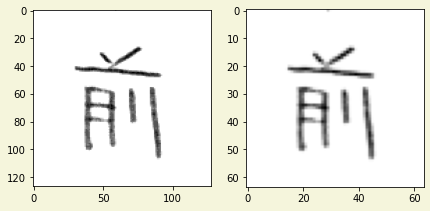

書


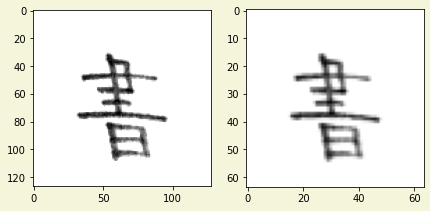

機


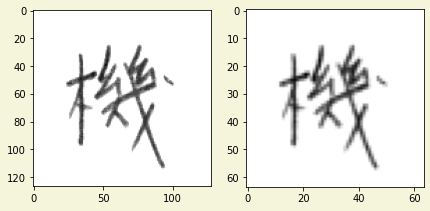

In [81]:
#print some example
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

for i in range(3):
  index = np.random.randint(NumberOfDatasets*KanjiPerDataset)
  print(actualKanji[train_labels[index]])

  fig = plt.figure(figsize=(7,7))
  fig.patch.set_facecolor('beige')

  plt.subplot(1,2,1)
  plt.grid(False)
  plt.imshow(kanjiSequential[index], cmap=plt.cm.binary)

  plt.subplot(1,2,2)
  plt.grid(False)
  plt.imshow(train_images[index], cmap=plt.cm.binary)

  plt.show()

In [10]:
#shuffling and splitting the training data
from sklearn.model_selection import train_test_split

train_images, test_images, train_labels, test_labels = train_test_split(train_images, train_labels, test_size=0.2)